In [31]:
#Importing necessary libraries for data manipulation, visualization, and feature scaling.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [53]:
#Reading a csv file and storing it in a DataFrame, header=None means that the csv file doesn't have column names.
df=pd.read_csv('emotions.csv') 

In [54]:
# show the data frame
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [55]:
#Displaying the information of the DataFrame, such as number of rows, columns, and data types of columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None


In [56]:
#Dropping any columns with missing values from the DataFrame.
df=df.dropna(axis='columns') 

In [57]:
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [58]:
#Displaying the summary statistics of the numerical columns in the DataFrame.
print(df.describe())

        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean      0.025378     0.052282     0.301655     0.036793     0.083567  ...   
std      17.981796     8.509174    68.098894    17.010031    18.935378  ...   
min    -218.00000

In [59]:
#Counting the number of missing values in each column of the DataFrame.
print(df.isnull().sum())

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64


In [60]:
#Checking whether there are any duplicate rows in the DataFrame.
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2127    False
2128    False
2129    False
2130    False
2131    False
Length: 2132, dtype: bool


In [40]:
df["label"][1]

'NEUTRAL'

In [61]:
#Filtering the rows of the dataframe where last column's value is 'NEUTRAL'.
df=df[df.iloc[:,-1]!='NEUTRAL']

In [108]:
df.iloc[:,-1]=[0 if i=="NEGATIVE" else 1 for i in df.iloc[:,-1].values ]

C:\Users\taha\AppData\Local\Temp\ipykernel_8028\2714261716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,-1]=[0 if i=="NEGATIVE" else 1 for i in df.iloc[:,-1].values ]
C:\Users\taha\AppData\Local\Temp\ipykernel_8028\2714261716.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1]=[0 if i=="NEGATIVE" else 1 for i in df.iloc[:,-1].values ]


In [109]:
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.30,-356.0,15.600,26.3,1.070,0.411,-15.70,2.06,3.150,...,23.5,20.3,20.3,23.5,-215.0,280.0,-162.00,-162.00,280.0,0
2,8.900,29.40,-416.0,16.700,23.7,79.900,3.360,90.20,89.90,2.030,...,462.0,-233.0,-233.0,462.0,-267.0,281.0,-148.00,-148.00,281.0,1
3,14.900,31.60,-143.0,19.800,24.3,-0.584,-0.284,8.82,2.30,-1.970,...,299.0,-243.0,-243.0,299.0,132.0,-12.4,9.53,9.53,-12.4,1
6,10.800,21.00,44.7,4.870,28.1,2.140,1.020,13.20,1.16,-4.390,...,-15.6,-41.0,-41.0,-15.6,89.5,40.6,-55.20,-55.20,40.6,1
7,17.800,27.80,-102.0,16.900,26.9,-3.210,-1.950,9.80,-3.24,-0.955,...,-177.0,32.8,32.8,-177.0,-417.0,384.0,-186.00,-186.00,384.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,6.160,18.90,-245.0,0.257,28.4,5.150,3.300,2.82,1.86,1.120,...,458.0,-221.0,-221.0,458.0,301.0,-98.9,32.70,32.70,-98.9,0
2126,-5.290,3.27,14.2,-15.500,16.6,1.260,-2.570,-9.13,3.33,-3.330,...,27.6,13.3,13.3,27.6,43.7,32.6,-11.30,-11.30,32.6,1
2128,16.300,31.30,-284.0,14.300,23.9,4.200,1.090,4.46,4.72,6.630,...,594.0,-324.0,-324.0,594.0,-35.5,142.0,-59.80,-59.80,142.0,1
2129,-0.547,28.30,-259.0,15.800,26.7,9.080,6.900,12.70,2.03,4.640,...,370.0,-160.0,-160.0,370.0,408.0,-169.0,-10.50,-10.50,-169.0,0


In [85]:
def drop_outliers_MAD(df, columns=None, threshold=20):
    """
    Drops the outlier rows from a DataFrame using the MAD method
    
    Parameters:
    - df: DataFrame to remove outliers from
    - columns: List of columns to check for outliers (default: None, checks all columns)
    - threshold: threshold multiplier for MAD (default: 3.5)
    
    Returns:
    - DataFrame with outliers removed
    """
    if columns is None:
        columns = df.columns
    for col in columns:
        median = df[col].median()
        mad = df[col].mad()
        lower_bound = median - (threshold * mad)
        upper_bound = median + (threshold * mad)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [110]:
dd=drop_outliers_MAD(df)

C:\Users\taha\AppData\Local\Temp\ipykernel_8028\2713838766.py:17: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = df[col].mad()


In [111]:
dd

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.30,-356.0,15.60,26.3,1.070,0.4110,-15.70,2.060,3.150,...,23.5,20.30,20.30,23.5,-215.00,280.0,-162.00,-162.00,280.0,0
3,14.90,31.60,-143.0,19.80,24.3,-0.584,-0.2840,8.82,2.300,-1.970,...,299.0,-243.00,-243.00,299.0,132.00,-12.4,9.53,9.53,-12.4,1
6,10.80,21.00,44.7,4.87,28.1,2.140,1.0200,13.20,1.160,-4.390,...,-15.6,-41.00,-41.00,-15.6,89.50,40.6,-55.20,-55.20,40.6,1
7,17.80,27.80,-102.0,16.90,26.9,-3.210,-1.9500,9.80,-3.240,-0.955,...,-177.0,32.80,32.80,-177.0,-417.00,384.0,-186.00,-186.00,384.0,0
9,8.91,29.20,-314.0,6.51,30.9,-1.880,1.9000,11.90,-3.600,5.700,...,226.0,-81.80,-81.80,226.0,1.84,99.4,-40.30,-40.30,99.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,16.00,33.80,-132.0,14.50,28.9,3.790,-0.0598,-5.49,4.000,-1.290,...,264.0,-65.70,-65.70,264.0,164.00,16.7,7.62,7.62,16.7,0
2121,8.10,30.10,21.1,1.84,22.7,0.896,-6.5600,3.35,0.452,-12.400,...,46.6,6.69,6.69,46.6,104.00,34.0,76.70,76.70,34.0,1
2126,-5.29,3.27,14.2,-15.50,16.6,1.260,-2.5700,-9.13,3.330,-3.330,...,27.6,13.30,13.30,27.6,43.70,32.6,-11.30,-11.30,32.6,1
2128,16.30,31.30,-284.0,14.30,23.9,4.200,1.0900,4.46,4.720,6.630,...,594.0,-324.00,-324.00,594.0,-35.50,142.0,-59.80,-59.80,142.0,1


In [102]:
X=dd.iloc[:,:-1].values


In [112]:
y= dd.iloc[:,-1].values 

1416

In [113]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [114]:
#Splitting the data into training and testing sets using the train_test_split function from sklearn.model_selection.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [115]:

from sklearn.naive_bayes import GaussianNB



# Train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [116]:
y_pred=clf.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9324324324324325


In [118]:
print("y_pred          y_test")
for i,j in zip(y_pred,y_test):
    print(i,"  ",j)

y_pred          y_test
1    1
1    1
0    0
0    0
0    0
1    1
0    0
1    1
0    0
0    0
0    0
0    0
0    0
0    0
0    1
1    1
1    1
1    1
0    0
0    0
1    1
1    1
1    1
1    1
1    1
1    1
0    0
0    0
0    0
0    0
0    0
1    1
0    0
1    1
1    1
0    1
1    1
0    0
0    0
0    0
1    1
1    1
0    0
0    0
0    0
0    0
1    1
1    1
1    1
1    1
1    1
1    1
1    1
0    0
1    1
1    1
0    0
1    1
0    0
0    0
1    1
1    1
0    0
0    0
1    1
0    0
0    0
0    0
1    1
0    0
0    0
1    1
0    0
0    0
0    1
1    1
0    0
1    1
0    1
1    1
1    1
0    0
1    1
1    1
1    1
0    0
0    0
1    1
0    0
1    1
0    0
0    0
0    1
1    1
1    1
1    1
1    1
0    0
0    1
1    1
0    0
0    0
1    1
0    0
1    0
0    0
1    1
1    1
1    1
0    0
1    1
0    0
0    0
1    1
0    1
0    0
0    1
0    0
0    0
0    0
0    0
1    0
0    0
0    0
1    1
0    0
0    0
0    0
0    0
1    1
1    1
0    0
1    1
1    1
1    1
1    1
0    0
0    0
1    1
1   

In [119]:
from sklearn.metrics import classification_report

# y_true are the true labels of the data
# y_pred are the predicted labels of the data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       114
           1       0.94      0.92      0.93       108

    accuracy                           0.93       222
   macro avg       0.93      0.93      0.93       222
weighted avg       0.93      0.93      0.93       222



The classification report shows that the model is performing well on both classes with a balanced precision and recall, which indicates that it has a good ability to identify positive cases without losing sight of the negative cases.

In [121]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation using 10 folds
scores = cross_val_score(clf, X, y, cv=10)

# Print the mean and standard deviation of the cross-validation scores
print("Mean score: ", scores.mean())
print("Standard deviation: ", scores.std())

Mean score:  0.9096314496314497
Standard deviation:  0.017404998752026963


the model has an average accuracy of 0.9096314496314497, which is relatively high. This indicates that the model is likely to perform well on unseen data.

The standard deviation of the cross-validation scores is 0.017404998752026963, which is relatively low. This suggests that the performance of the model is consistent across different subsets of the data, and that the model is not overfitting or underfitting.

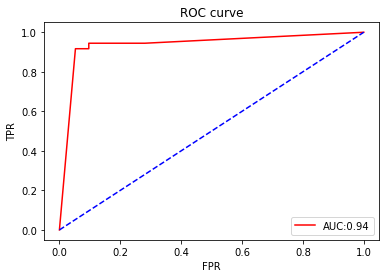

In [125]:
import sklearn.metrics as metrics
probs=clf.predict_proba(X_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
roc_auc=metrics.auc(fpr,tpr)

plt.title("ROC curve")
plt.plot(fpr,tpr,color="red",label="AUC:"+str(round(roc_auc,2)))
plt.plot([0,1],[0,1],color="blue",linestyle="--")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

An AUC of 0.94 means that the model has a high ability to distinguish between positive and negative examples, and is able to correctly classify a large proportion of positive examples as positive, and negative examples as negative.


In [126]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[108   6]
 [  9  99]]


In this confusion matrix, the number 108 in the top left cell represents the number of true positives, which means the number of observations correctly classified as class "0".

The number 99 in the bottom right cell represents the number of true negatives, which means the number of observations correctly classified as class "1".

The number 6 in the top right cell represents the number of false positives, which means the number of observations that were incorrectly classified as class "0".

The number 9 in the bottom left cell represents the number of false negatives, which means the number of observations that were incorrectly classified as class "1".